In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

In [2]:
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), np.array([1 for x in range(n_samples)])

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

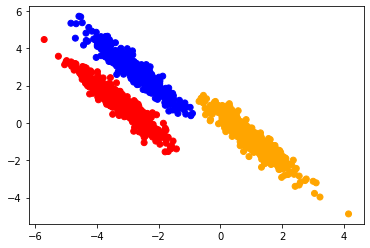

In [4]:
data=aniso
#data=varied
#data=noisy_moons
#data=noisy_circles
#data=blobs
color=['red','blue','orange','black', 'purple','pink']
X,y=data
plt.scatter(X[:,0], X[:,1],  c=np.array([color[x] for x in y] ))
plt.show()


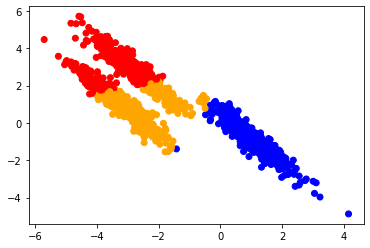

In [5]:
from sklearn.cluster import KMeans
clustering = KMeans(n_clusters=3, random_state=0).fit(X)
pred=clustering.predict(X)
plt.scatter(X[:,0], X[:,1],  c=np.array([color[x] for x in pred] ))
plt.show()

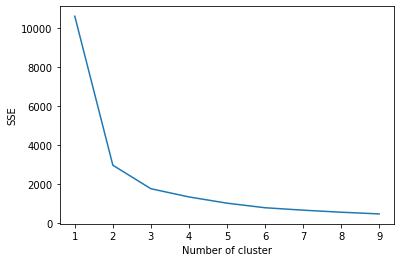

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [7]:
sse

{1: 10601.623138939562,
 2: 2950.8697422575724,
 3: 1743.167570547836,
 4: 1321.9390236858053,
 5: 1001.4617708045835,
 6: 766.8452740625376,
 7: 641.8739434095392,
 8: 536.9127861539217,
 9: 449.49312522423634}

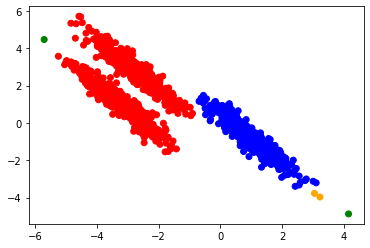

In [8]:
from sklearn.cluster import DBSCAN
pred = DBSCAN(eps=0.4, min_samples=2).fit_predict(X)

plt.scatter(X[:,0], X[:,1],  c=np.array([color[x%6] if x>=0 else 'green' for x in pred ] ))
plt.show()

In [9]:
pred


array([0, 0, 0, ..., 1, 1, 1])

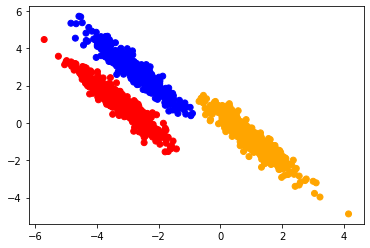

In [10]:

from sklearn import cluster, datasets, mixture
clustering = mixture.GaussianMixture(n_components=3, covariance_type='full').fit(X)
pred=clustering.predict(X)
plt.scatter(X[:,0], X[:,1],  c=np.array([color[x] for x in pred] ))
plt.show()

In [11]:
clustering.sample(3)

(array([[-2.21839733, -0.33606743],
        [-3.22210648,  3.66711467],
        [ 1.0959064 , -0.89230063]]), array([0, 1, 2]))

In [13]:
pred.shape

(1500,)